In [5]:
import pandas as pd


In [6]:
df=pd.read_csv('car_data.csv')
df.head()



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
df.shape


(4340, 8)

In [8]:

# Summary statistics
print("\nSummary statistics:")
print(df.describe())




Summary statistics:
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


In [9]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


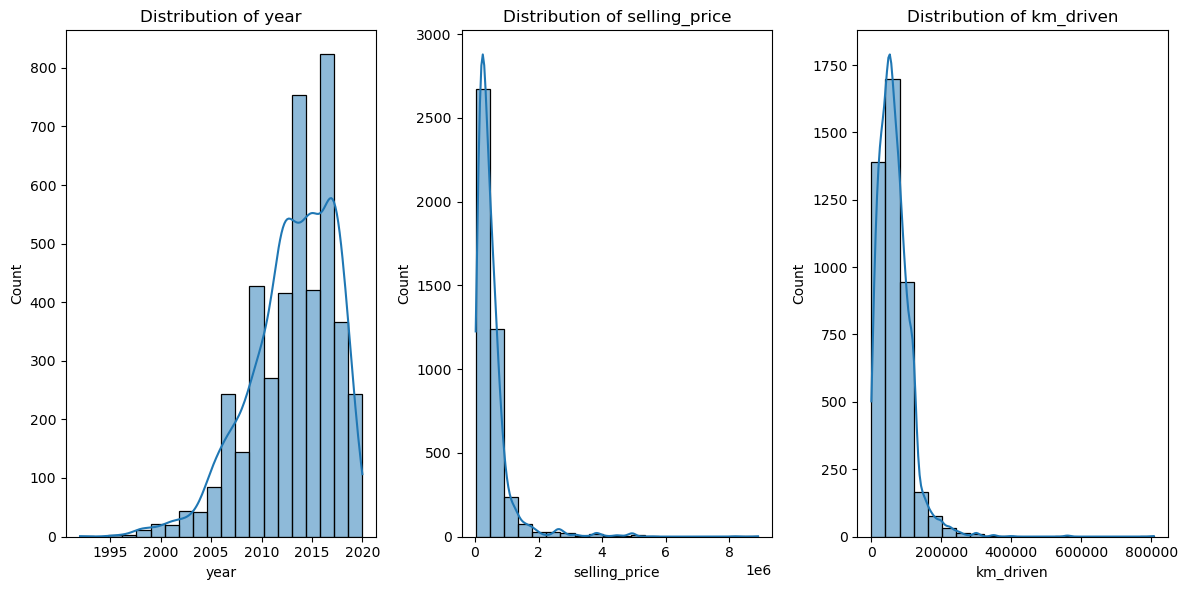

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of numerical features
numerical_features = ["year", "selling_price", "km_driven"]
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()



In [11]:
print(df['seller_type'].unique())
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


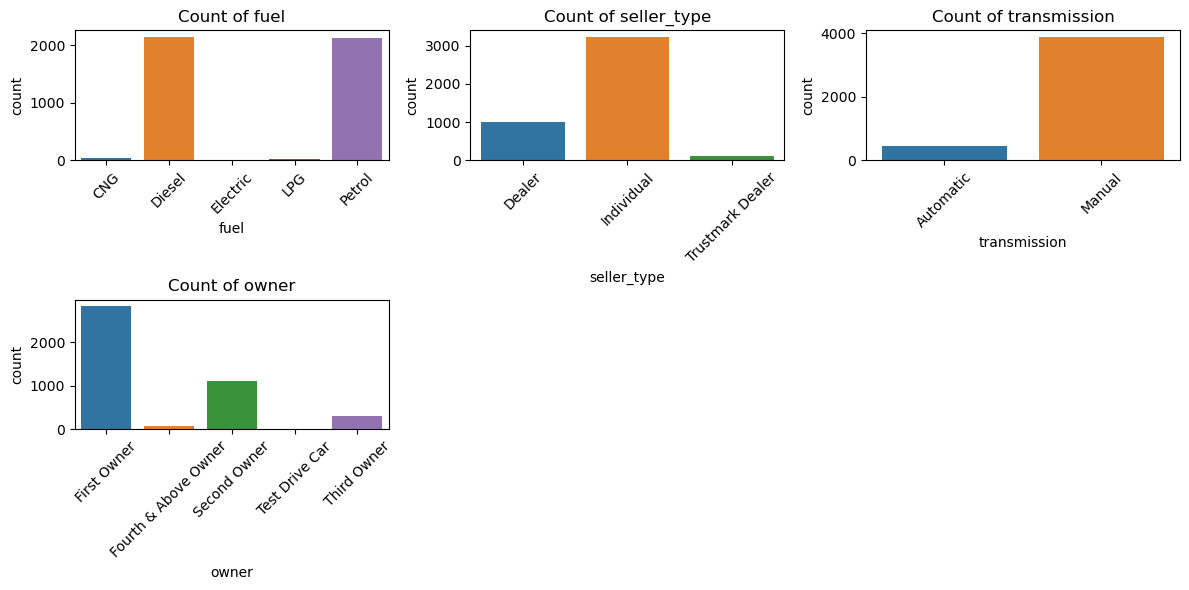

In [12]:
# Convert categorical columns to categorical data type
categorical_columns = [ "fuel", "seller_type", "transmission", "owner"]
for col in categorical_columns:
    df[col] = df[col].astype("category")

# Visualize categorical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature)
    plt.title(f"Count of {feature}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
final_dataset=df[['year','selling_price','km_driven','fuel','seller_type','transmission','owner']]

In [14]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [15]:
final_dataset['current_year']=2024

In [16]:
final_dataset['no_year']=final_dataset['current_year']- final_dataset['year']

In [17]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2024,17
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2024,17
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2024,12
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2024,7
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2024,10


In [18]:
final_dataset.drop(['year'],axis=1,inplace=True)

In [19]:
final_dataset.drop(['current_year'],axis=1,inplace=True)

In [20]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,60000,70000,Petrol,Individual,Manual,First Owner,17
1,135000,50000,Petrol,Individual,Manual,First Owner,17
2,600000,100000,Diesel,Individual,Manual,First Owner,12
3,250000,46000,Petrol,Individual,Manual,First Owner,7
4,450000,141000,Diesel,Individual,Manual,Second Owner,10


In [21]:
df_final = final_dataset[final_dataset['no_year'] <= 10]
df_final.reset_index(drop=True, inplace=True)

In [22]:
df_final.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_year
0,250000,46000,Petrol,Individual,Manual,First Owner,7
1,450000,141000,Diesel,Individual,Manual,Second Owner,10
2,550000,25000,Petrol,Individual,Manual,First Owner,8
3,240000,60000,Petrol,Individual,Manual,Second Owner,10
4,850000,25000,Petrol,Individual,Manual,First Owner,9


In [23]:
df_final.shape

(2220, 7)